<a href="https://colab.research.google.com/github/roboy88/tigergraph-solution-stack/blob/main/tigergraph_solution_stack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.8 MB/s eta 0:00:00


In [ ]:
# === SETUP: LIBRARIES ===
import pandas as pd
import requests
import networkx as nx
from pyvis.network import Network

# === STEP 1: SIMULATED DATA LOAD ===
# Replace with actual CSV paths or data sources
customer_data = {
    "id": ["C1", "C2", "C3"],
    "name": ["Alice", "Bob", "Charlie"]
}
product_data = {
    "id": ["P1", "P2", "P3"],
    "name": ["Widget", "Gadget", "Thing"]
}
purchase_data = {
    "customer_id": ["C1", "C2", "C1", "C3"],
    "product_id": ["P1", "P2", "P2", "P3"]
}

df_customers = pd.DataFrame(customer_data)
df_products = pd.DataFrame(product_data)
df_purchases = pd.DataFrame(purchase_data)

display(df_customers)
display(df_products)
display(df_purchases)

# === STEP 2: BUILD GRAPH ===
G = nx.Graph()

# Add customer and product nodes
for _, row in df_customers.iterrows():
    G.add_node(row["id"], label=row["name"], type="customer")

for _, row in df_products.iterrows():
    G.add_node(row["id"], label=row["name"], type="product")

# Add edges (purchases)
for _, row in df_purchases.iterrows():
    G.add_edge(row["customer_id"], row["product_id"], relationship="purchased")

# === STEP 3: VISUALIZE WITH PYVIS ===
net = Network(height="600px", width="100%", notebook=True)
net.from_nx(G)
net.show("graph.html")

# === STEP 4: TIGERGRAPH API EXAMPLE (OPTIONAL) ===
# Replace <host>, <graph_name>, and <token> with actual values
url = "http://<YOUR_TIGERGRAPH_HOST>/restpp/query/<GRAPH_NAME>/communityDetection"
headers = {
    "Authorization": "Bearer <YOUR_AUTH_TOKEN>",
    "Accept": "application/json"
}

# Uncomment this when real endpoint is available
# response = requests.get(url, headers=headers)
# print(response.json())

# === STEP 5: Summary ===
print("Graph built with:", len(G.nodes), "nodes and", len(G.edges), "edges.")


,id,name
0,C1,Alice
1,C2,Bob
2,C3,Charlie


,id,name
0,P1,Widget
1,P2,Gadget
2,P3,Thing


,customer_id,product_id
0,C1,P1
1,C2,P2
2,C1,P2
3,C3,P3


graph.html
Graph built with: 6 nodes and 4 edges.


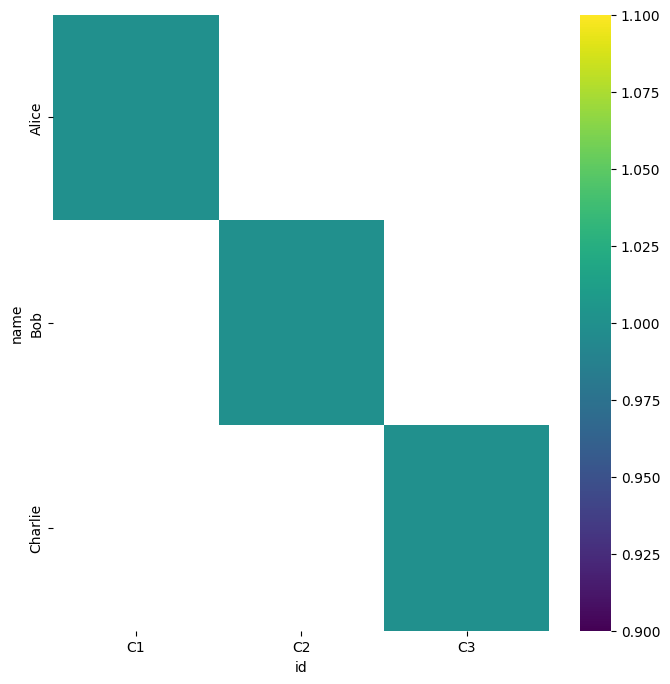

In [ ]:
# @title id vs name

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['name'].value_counts()
    for x_label, grp in df_customers.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('name')

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_customers)

https://docs.google.com/spreadsheets/d/1Mubs6N9xWG06NNq8-CgDWE__6WNbM1BN_2sBAOIMHME/edit#gid=0
